In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [2]:
df = pd.read_csv("../data/processed_weather_data.csv")

X = df.drop("weather", axis=1)
y = df["weather"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
model = joblib.load("../models/weather_model.pkl")

In [5]:
y_pred = model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.0


In [7]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



c:\Users\sumit\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sumit\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sumit\Downloads\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sumit\Downloads\Lib\site-pa

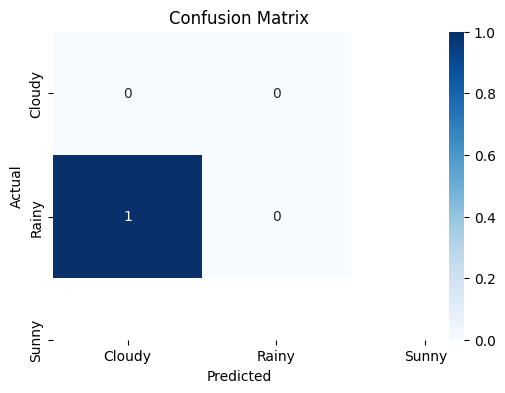

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Cloudy", "Rainy", "Sunny"],
    yticklabels=["Cloudy", "Rainy", "Sunny"]
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": joblib.load("../models/logistic_model.pkl"),
    "Decision Tree": joblib.load("../models/decision_tree_model.pkl"),
    "Random Forest": joblib.load("../models/random_forest_model.pkl")
}

df = pd.read_csv("../data/processed_weather_data.csv")
X = df.drop("weather", axis=1)
y = df["weather"]

results = {}

for name, model in models.items():
    y_pred = model.predict(X)
    results[name] = accuracy_score(y, y_pred)

results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
results_df

c:\Users\sumit\Downloads\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\sumit\Downloads\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Accuracy
Logistic Regression,0.8
Decision Tree,0.8
Random Forest,0.6


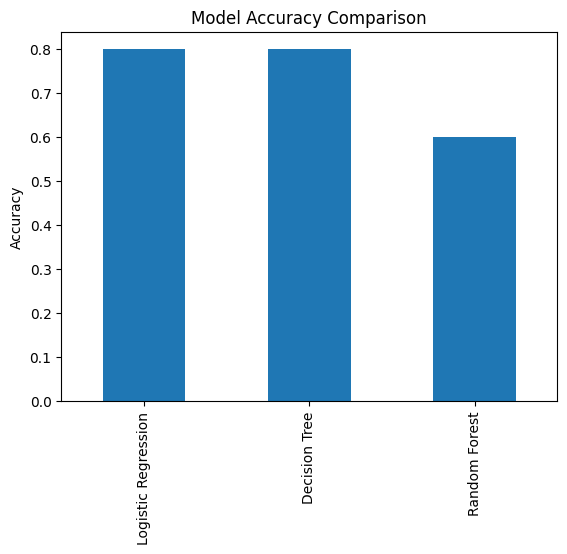

In [10]:
results_df.plot(kind="bar", legend=False, title="Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()